<a href="https://colab.research.google.com/github/hossboll/apriori_activity/blob/main/Atividade_Pr%C3%A1tica_Algoritmo_Apriori.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INF01017 - Aprendizado de Máquina - INF/UFRGS
## Atividade Prática - Algoritmo Apriori
O algoritmo Apriori é amplamente utilizado em mineração de dados para descobrir regras de associação entre itens em um conjunto de dados. Ele é baseado na ideia de que, se um conjunto de itens é frequentemente encontrado juntos, então esses itens são mais propensos a serem encontrados juntos novamente no futuro. O algoritmo funciona criando conjuntos de itens frequentes e, em seguida, gerando regras de associação com base nesses conjuntos.

Uma das principais vantagens do algoritmo Apriori é que ele é eficiente em termos de tempo de processamento, mesmo em grandes conjuntos de dados. No entanto, ele pode ser limitado pelo número de itens no conjunto de dados e pela suporte mínimo necessário para considerar um conjunto de itens frequente. Além disso, o algoritmo Apriori pode gerar regras de associação que não são realmente úteis ou relevantes. Por isso, é importante usar algumas técnicas para selecionar apenas as regras mais significativas: por exemplo, observando medidas de suporte, confiança e lift para determinar a importância das regras geradas.

Essa atividade irá explorar o funcionamento do algoritmo Apriori e como certas configurações afetam as regras de associação geradas. Este Colab deve ser usado como base para o preenchimento do questionário encontrado no Moodle. Faça uma cópia do mesmo para realizar o exercício (File > "Save a Copy in Drive"). Não é necessário entregar este Colab preenchido, mas guarde-o caso você ache necessário.

### Objetivos da Atividade
*   Ajustar os parâmetros do algoritmo Apriori para identificar conjuntos de itens frequentes de forma eficiente
*   Utilizar medidas de interesse para **avaliar a relevância das regras** de associação geradas e selecionar as mais significativas
*   Aplicar **técnicas de visualização** para interpretar e comunicar os resultados das regras de associação geradas

##Sobre os Dados

O dataset [Groceries](https://www.kaggle.com/datasets/heeraldedhia/groceries-dataset) está disponível no [Kaggle](https://www.kaggle.com/) e contém informações de 38.765 transações realizadas em um supermercado. Ele contém 3 atributos: a identificação do cliente (Member_number), a data da transação (Date) e o item comprado (itemDescription). Cada item comprado é registrado como uma instância diferente.

O objetivo da tarefa será identificar associações relevantes entre diferentes produtos comprados pelos clientes, uma tarefa conhecida como **Market Basket Analysis**. Por exemplo, se uma pessoa compra leite, será que ela tende também a frequentemente comprar algum outro produto junto? Vamos descobrir.

### Obtenção e Análise dos Dados
O código abaixo carrega o dataset Groceries e mostra algumas informações básicas sobre os dados:

In [39]:
import pandas as pd 
import numpy as np
from IPython.display import display # para melhor visualização do dataset

url = 'https://raw.githubusercontent.com/hossboll/apriori_activity/main/groceriesDataset.csv' 
groceries = pd.read_csv(url, encoding='latin-1', )

# visualização do dataset Groceries
display(groceries)

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
...,...,...,...
38760,4471,08-10-2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,03-12-2014,fruit/vegetable juice


In [40]:
print(f"Variedade de produtos vendidos: {groceries.itemDescription.unique()}") 

Variedade de produtos vendidos: ['tropical fruit' 'whole milk' 'pip fruit' 'other vegetables' 'rolls/buns'
 'pot plants' 'citrus fruit' 'beef' 'frankfurter' 'chicken' 'butter'
 'fruit/vegetable juice' 'packaged fruit/vegetables' 'chocolate'
 'specialty bar' 'butter milk' 'bottled water' 'yogurt' 'sausage'
 'brown bread' 'hamburger meat' 'root vegetables' 'pork' 'pastry'
 'canned beer' 'berries' 'coffee' 'misc. beverages' 'ham' 'turkey'
 'curd cheese' 'red/blush wine' 'frozen potato products' 'flour' 'sugar'
 'frozen meals' 'herbs' 'soda' 'detergent' 'grapes' 'processed cheese'
 'fish' 'sparkling wine' 'newspapers' 'curd' 'pasta' 'popcorn'
 'finished products' 'beverages' 'bottled beer' 'dessert' 'dog food'
 'specialty chocolate' 'condensed milk' 'cleaner' 'white wine' 'meat'
 'ice cream' 'hard cheese' 'cream cheese ' 'liquor' 'pickled vegetables'
 'liquor (appetizer)' 'UHT-milk' 'candy' 'onions' 'hair spray'
 'photo/film' 'domestic eggs' 'margarine' 'shopping bags' 'salt' 'oil'
 'whipp

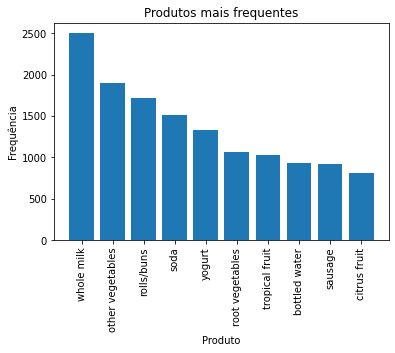

In [41]:
import matplotlib.pyplot as plt

# contar frequência dos 10 produtos mais frequentes
item_counts = groceries['itemDescription'].value_counts().head(10)

# gerar um barchart com os 10 produtos mais frequentes
plt.bar(item_counts.index, item_counts.values)
plt.xticks(rotation=90)
plt.title('Produtos mais frequentes')
plt.xlabel('Produto')
plt.ylabel('Frequência')
plt.show()

In [42]:
print(f"Número de total de compras: {len(groceries)}") 
print(f"Todas as compras foram realizadas entre",groceries.Date.min(),"e", groceries.Date.max())
n_milk = np.sum(groceries.itemDescription == 'whole milk')
print("Total de compras de leite: %d" % n_milk)

Número de total de compras: 38765
Todas as compras foram realizadas entre 01-01-2014 e 31-10-2015
Total de compras de leite: 2502


Como pode ser visto, o dataset possui 3 colunas e é composto por 38.765 compras. Desse total, 2.502 foram de leite - o produto mais frequente.

### Pré-processamento dos Dados

Antes de aplicar o algoritmo Apriori, é necessário transformar o dataframe Groceries em um formato transacional. Isso é feito agrupando os itens comprados para cada membro em cada data. Uma transação, no contexto do dataset Groceries, é uma coleção de itens que foram comprados juntos por um cliente em uma única compra.

Vamos realizar esse agrupamento e visualizar o dataset resultante.

In [ ]:
# agrupar itens por cliente e data da compra
items_set = groceries.groupby(['Member_number', 'Date'])['itemDescription'].apply(list).reset_index(name='Items')

# visualizar o dataset que retorna uma lista de itens para cada cliente
display(items_set)

In [ ]:
# remover número do cliente e data para a próxima etapa
items_set = items_set.drop(['Member_number', 'Date'], axis=1)
display(items_set)

Agora, é necessário transformar os dados transacionais em uma matriz binária com valores booleanos. Cada coluna representará um item e cada linha representará uma transação. O valor de cada célula será "True" se o item está presente para certa transação de cliente e "False" caso contrário.

Algumas bibliotecas em Python, como o mlxtend, oferecem funções prontas para fazer essa transformação.

In [46]:
from mlxtend.preprocessing import TransactionEncoder

# criar uma lista de listas de itens
items_list = items_set['Items'].tolist()

# gerar e visualizar a matriz binária de itens
te = TransactionEncoder()
te_ary = te.fit_transform(items_list)
items_matrix = pd.DataFrame(te_ary, columns=te.columns_)
display(items_matrix)

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14958,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
14959,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14960,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14961,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Como você pode ver, cada item é agora representado em uma coluna, e cada linha indica uma transação. Pelas dimensões da tabela, verificamos que o dataset items_matrix possui 14.963 transações envolvendo 167 tipos de itens diferentes. Novamente, um item indicará "True" se aparece em dada transação e "False" caso contrário.

Pdemos agora utilizar essa tabela para a aplicação do algoritmo Apriori.



##Mineração de *itemsets* frequentes
Vamos agora aplicar o algoritmo Apriori para identificar conjuntos de itens frequentemente comprados juntos no supermercado. Nesse primeiro momento, vamos definir o suporte mínimo de 0.5% - ou seja, um itemset deve aparecer em pelo menos 5 a cada 1000 transações para ser considerado frequente.

### **Use o código abaixo para responder à Questão 2 do questionário.**

In [49]:
from mlxtend.frequent_patterns import apriori, association_rules

# aplicar o algoritmo apriori na matriz binária de itens, com suporte mínimo = 0.5%
frequent_itemsets = apriori(items_matrix, min_support=0.005, use_colnames=True)

# adicionar uma coluna que indica quantos produtos o itemset tem e ordenar por suporte decrescente
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets.sort_values(by='support', inplace=True, ascending=False)

# visualizar itemsets frequentes
display(frequent_itemsets)

,support,itemsets,length
87,0.157923,(whole milk),1
53,0.122101,(other vegetables),1
66,0.110005,(rolls/buns),1
75,0.097106,(soda),1
88,0.085879,(yogurt),1
...,...,...,...
58,0.005280,(photo/film),1
124,0.005213,"(tropical fruit, yogurt)",2
95,0.005146,"(other vegetables, frankfurter)",2
107,0.005012,"(pork, whole milk)",2


##Geração de regras de associação a partir de *itemsets* frequentes

A partir dos itemsets frequentes obtidos com o algoritmo Apriori, podemos gerar regras de associação que indicam a probabilidade de um item ser comprado em conjunto com outro(s). 

A confiança é uma métrica importante para avaliar a qualidade das regras geradas. Ela mede a porcentagem de transações que contêm todos os itens do antecedente e também contêm todos os itens do consequente. Estipularemos a confiança inicial de 5% - ou seja, as regras de associação geradas devem ser verdadeiras em pelo menos 5% das transações que contêm o antecedente.

### **Use o código abaixo para responder à Questão 3 do questionário.**

In [ ]:
# coletar as regras de associação inferidas com o algoritmo apriori, com confiança mínima de 5%
rules = association_rules(frequent_itemsets, metric ="confidence", min_threshold = 0.05)
rules = rules.sort_values(['confidence', 'support'], ascending =[False, False])
rules = rules.drop(['antecedent support', 'consequent support', 'leverage', 'conviction'], axis=1)
display(rules)

##Visualização das regras de associação a partir de itemsets frequentes

Agora, podemos visualizar as regras de associação que indicam a probabilidade de um item ser comprado em conjunto com outro(s).
### **Use o código abaixo para responder à Questão 4 do questionário.**

In [51]:
import altair as alt
rules = pd.DataFrame(rules)
rules['antecedents'] = rules['antecedents'].apply(tuple)
rules['consequents'] = rules['consequents'].apply(tuple)

# criar limites para os eixos, a fim do gráfico se adaptar às faixas de valores de suporte e confiança
x_range = alt.Scale(domain=[rules['support'].min(), rules['support'].max()], nice=False)
y_range = alt.Scale(domain=[rules['confidence'].min(), rules['confidence'].max()], nice=False)

# criar o gráfico interativo - suporte no eixo x, confiança no eixo y e mapeamento de cores baseado no valor de lift
rules.viz = alt.Chart(rules).mark_circle().encode(
    x=alt.X('support', scale=x_range, title='Suporte'),
    y=alt.Y('confidence', scale=y_range, title='Confiança'),
    tooltip=['antecedents', 'consequents', 'support', 'confidence', 'lift'],
    color=alt.Color('lift', scale=alt.Scale(range=['#13078A', '#F2F321']))
)
rules.viz = rules.viz.interactive().properties( # tornar o gráfico interativo - com isso, você pode dar zoom out, zoom in e verificar as regras por hover
    title='Scatterplot das regras de associação',
    width=500,
    height=300
).configure_axis(
    labelFontSize=8, titleFontSize=12
).configure_title(
    fontSize=14
)

# plotar o gráfico
rules.viz

alt.Chart(...)

### **Use o código abaixo para responder às Questões 5 e 6 do questionário.**

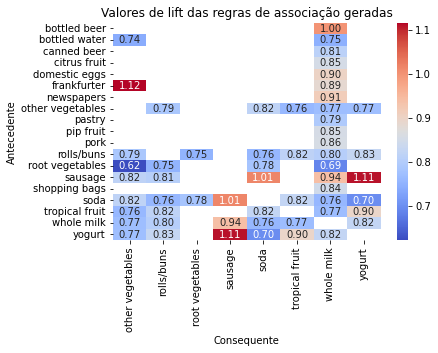

In [56]:
import seaborn as sns

# criar lista de antecedentes e consequentes presentes nas regras de associação
items = list(set(rules['antecedents']).union(set(rules['consequents'])))

# criar tabela pivot dos valores de lift das regras
pivot = pd.pivot_table(rules, values='lift', index='antecedents', columns='consequents')
pivot.replace('', np.nan, inplace=True)
pivot.index = [','.join(map(str, item)).replace('(','').replace(')','').replace(',','') for item in pivot.index]
pivot.columns = [','.join(map(str, item)).replace('(','').replace(')','').replace(',','') for item in pivot.columns]

# plotar o heatmap dos valores de lift
sns.heatmap(pivot, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Valores de lift das regras de associação geradas')
plt.xlabel('Consequente')
plt.ylabel('Antecedente')
plt.show()
